We will work through the LAB for classfication chapter in ISLR.

Basic functions that perform least squares linear regression and other simple analyses come standard with the base distribution named MASS. So we use the library() function to run it.


In [177]:
lodalibraries=function(){
    library('MASS')
    library('class')
    library('ISLR')
    print('Libraries Loaded')
}

In [178]:
lodalibraries()

[1] "Libraries Loaded"


# 10-

In [180]:
attach(Weekly)
#fix(Weekly)
names(Weekly)
summary(Weekly)
cor(Weekly[,-9])


The following objects are masked from Weekly (pos = 3):

    Direction, Lag1, Lag2, Lag3, Lag4, Lag5, Today, Volume, Year

The following objects are masked from Weekly (pos = 4):

    Direction, Lag1, Lag2, Lag3, Lag4, Lag5, Today, Volume, Year

The following objects are masked from Weekly (pos = 5):

    Direction, Lag1, Lag2, Lag3, Lag4, Lag5, Today, Volume, Year

The following objects are masked from Weekly (pos = 6):

    Direction, Lag1, Lag2, Lag3, Lag4, Lag5, Today, Volume, Year

The following objects are masked from Weekly (pos = 7):

    Direction, Lag1, Lag2, Lag3, Lag4, Lag5, Today, Volume, Year

The following objects are masked from Smarket (pos = 9):

    Direction, Lag1, Lag2, Lag3, Lag4, Lag5, Today, Volume, Year

The following objects are masked from Smarket (pos = 10):

    Direction, Lag1, Lag2, Lag3, Lag4, Lag5, Today, Volume, Year



[1] "Year"      "Lag1"      "Lag2"      "Lag3"      "Lag4"      "Lag5"     
[7] "Volume"    "Today"     "Direction"

      Year           Lag1               Lag2               Lag3         
 Min.   :1990   Min.   :-18.1950   Min.   :-18.1950   Min.   :-18.1950  
 1st Qu.:1995   1st Qu.: -1.1540   1st Qu.: -1.1540   1st Qu.: -1.1580  
 Median :2000   Median :  0.2410   Median :  0.2410   Median :  0.2410  
 Mean   :2000   Mean   :  0.1506   Mean   :  0.1511   Mean   :  0.1472  
 3rd Qu.:2005   3rd Qu.:  1.4050   3rd Qu.:  1.4090   3rd Qu.:  1.4090  
 Max.   :2010   Max.   : 12.0260   Max.   : 12.0260   Max.   : 12.0260  
      Lag4               Lag5              Volume            Today         
 Min.   :-18.1950   Min.   :-18.1950   Min.   :0.08747   Min.   :-18.1950  
 1st Qu.: -1.1580   1st Qu.: -1.1660   1st Qu.:0.33202   1st Qu.: -1.1540  
 Median :  0.2380   Median :  0.2340   Median :1.00268   Median :  0.2410  
 Mean   :  0.1458   Mean   :  0.1399   Mean   :1.57462   Mean   :  0.1499  
 3rd Qu.:  1.4090   3rd Qu.:  1.4050   3rd Qu.:2.05373   3rd Qu.:  1.4050  
 Max.   : 12.0260   Max.   : 12.0

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.00000000,-0.032289274,-0.03339001,-0.03000649,-0.031127923,-0.030519101,0.84194162,-0.032459894
Lag1,-0.03228927,1.000000000,-0.07485305,0.05863568,-0.071273876,-0.008183096,-0.06495131,-0.075031842
Lag2,-0.03339001,-0.074853051,1.00000000,-0.07572091,0.058381535,-0.072499482,-0.08551314,0.059166717
Lag3,-0.03000649,0.058635682,-0.07572091,1.00000000,-0.075395865,0.060657175,-0.06928771,-0.071243639
Lag4,-0.03112792,-0.071273876,0.05838153,-0.07539587,1.000000000,-0.075675027,-0.06107462,-0.007825873
Lag5,-0.03051910,-0.008183096,-0.07249948,0.06065717,-0.075675027,1.000000000,-0.05851741,0.011012698
Volume,0.84194162,-0.064951313,-0.08551314,-0.06928771,-0.061074617,-0.058517414,1.00000000,-0.033077783
Today,-0.03245989,-0.075031842,0.05916672,-0.07124364,-0.007825873,0.011012698,-0.03307778,1.000000000


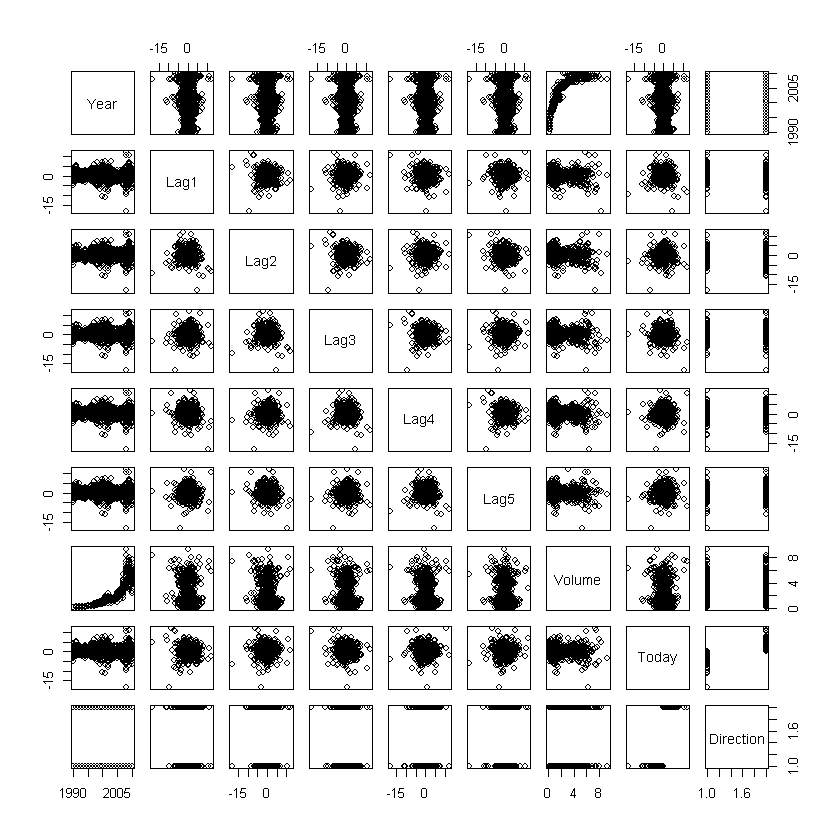

In [181]:
pairs(Weekly)

As you can see for the covariance matrix and the scatterplots there is no clear relationship between the variables. 

In [184]:
lorf=glm(Direction~.-Year-Today,data=Weekly,family = binomial)
summary(lorf)


Call:
glm(formula = Direction ~ . - Year - Today, family = binomial, 
    data = Weekly)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6949  -1.2565   0.9913   1.0849   1.4579  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.26686    0.08593   3.106   0.0019 **
Lag1        -0.04127    0.02641  -1.563   0.1181   
Lag2         0.05844    0.02686   2.175   0.0296 * 
Lag3        -0.01606    0.02666  -0.602   0.5469   
Lag4        -0.02779    0.02646  -1.050   0.2937   
Lag5        -0.01447    0.02638  -0.549   0.5833   
Volume      -0.02274    0.03690  -0.616   0.5377   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1496.2  on 1088  degrees of freedom
Residual deviance: 1486.4  on 1082  degrees of freedom
AIC: 1500.4

Number of Fisher Scoring iterations: 4


The coefficient for Lag2 seem to be slightly significant, while the others are not significant.

In [190]:
contrasts(Direction)

,Up
Down,0
Up,1


In [191]:
predpron=predict(lorf,type = 'response')
response=rep('Down',nrow(Weekly))
response[predpron>0.5]='Up'
print('The confusion matrix is as follows:')
table(response,Weekly$Direction)
print('The accuracy is:')
mean(response==Weekly$Direction)

[1] "The confusion matrix is as follows:"


        
response Down  Up
    Down   54  48
    Up    430 557

[1] "The accuracy is:"


[1] 0.5610652

Seems like our model is better than random guessing, although we must keep in mind that this accuracy is concerning the training data set. 

By investigating the confusion matrix we can get some results: 

    1- Only 45/(430+54)=0.1115 of the Down movement were predicted accurately.
    2- In the other hand, 557/(557+48)=0.92 of Up movement were predicted accurately.


In [213]:
#Spliting data into train and test sets:
train=Weekly[Year<2009,]
test=Weekly[Year>=2009,]
lorf=glm(Direction~Lag2,data=train,family = binomial)
summary(lorf)
response=rep('Down',nrow(test))
response[predict(lorf,test,type='response')>0.5]='Up'
table(response,test$Direction)
mean(response==test$Direction)


Call:
glm(formula = Direction ~ Lag2, family = binomial, data = train)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.536  -1.264   1.021   1.091   1.368  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.20326    0.06428   3.162  0.00157 **
Lag2         0.05810    0.02870   2.024  0.04298 * 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1354.7  on 984  degrees of freedom
Residual deviance: 1350.5  on 983  degrees of freedom
AIC: 1354.5

Number of Fisher Scoring iterations: 4


        
response Down Up
    Down    9  5
    Up     34 56

[1] 0.625

In [216]:
print('****LINEAR DISCRIMINANT ANALYSIS****')
ldaf=lda(Direction~Lag2,data=train)
ldaf
table(predict(ldaf,test)$class,test$Direction)
print('****QUADRATIC DISCRIMINANT ANALYSIS****')
qdaf=qda(Direction~Lag2,data=train)
qdaf
table(predict(qdaf,test)$class,test$Direction)
print('****1-KNN****')
set.seed(1)
trainX=as.matrix(train$Lag2)
testX=as.matrix(test$Lag2)
labelsDir=as.matrix(train$Direction)
knnf=knn(trainX,testX,labelsDir,k=1)
table(knnf,test$Direction)
print('****5-KNN****')
set.seed(2)
knnf5=knn(trainX,testX,labelsDir,k=5)
table(knnf5,test$Direction)
print('****10-KNN****')
set.seed(3)
knnf10=knn(trainX,testX,labelsDir,k=10)
table(knnf10,test$Direction)
results=data.frame('Model'=c('Logistic Regression','LDA','QDA','1-KNN','5-KNN','10-KNN'),'Accuracy'=c(mean(response==test$Direction),mean(predict(ldaf,test)$class==test$Direction),mean(predict(qdaf,test)$class==test$Direction),mean(knnf==test$Direction),mean(knnf5==test$Direction),mean(knnf10==test$Direction)))
print('****SUMMARY****')
results

[1] "****LINEAR DISCRIMINANT ANALYSIS****"


Call:
lda(Direction ~ Lag2, data = train)

Prior probabilities of groups:
     Down        Up 
0.4477157 0.5522843 

Group means:
            Lag2
Down -0.03568254
Up    0.26036581

Coefficients of linear discriminants:
           LD1
Lag2 0.4414162

      
       Down Up
  Down    9  5
  Up     34 56

[1] "****QUADRATIC DISCRIMINANT ANALYSIS****"


Call:
qda(Direction ~ Lag2, data = train)

Prior probabilities of groups:
     Down        Up 
0.4477157 0.5522843 

Group means:
            Lag2
Down -0.03568254
Up    0.26036581

      
       Down Up
  Down    0  0
  Up     43 61

[1] "****1-KNN****"


      
knnf   Down Up
  Down   21 30
  Up     22 31

[1] "****5-KNN****"


      
knnf5  Down Up
  Down   15 22
  Up     28 39

[1] "****10-KNN****"


      
knnf10 Down Up
  Down   18 21
  Up     25 40

[1] "****SUMMARY****"


Model,Accuracy
Logistic Regression,0.6250000
LDA,0.6250000
QDA,0.5865385
1-KNN,0.5000000
5-KNN,0.5192308
10-KNN,0.5576923


Logistic regression and LDA have provided the best test error rates, compared to more flexible methods like qda and KNN. 

# 11-

In [274]:
attach(Auto)
mpg01=rep(0,nrow(Auto))
mpg01[mpg>median(mpg)]=1
mpg01=as.matrix(mpg01)
auto=data.frame(mpg01,Auto[,-1])

The following objects are masked from Auto (pos = 3):

    acceleration, cylinders, displacement, horsepower, mpg, name,
    origin, weight, year

The following objects are masked from Auto (pos = 4):

    acceleration, cylinders, displacement, horsepower, mpg, name,
    origin, weight, year

The following objects are masked from Auto (pos = 5):

    acceleration, cylinders, displacement, horsepower, mpg, name,
    origin, weight, year

The following objects are masked from Auto (pos = 6):

    acceleration, cylinders, displacement, horsepower, mpg, name,
    origin, weight, year

The following objects are masked from Auto (pos = 7):

    acceleration, cylinders, displacement, horsepower, mpg, name,
    origin, weight, year

The following objects are masked from Auto (pos = 8):

    acceleration, cylinders, displacement, horsepower, mpg, name,
    origin, weight, year

The following objects are masked from Auto (pos = 9):

    acceleration, cylinders, displacement, horsepower, mpg, nam

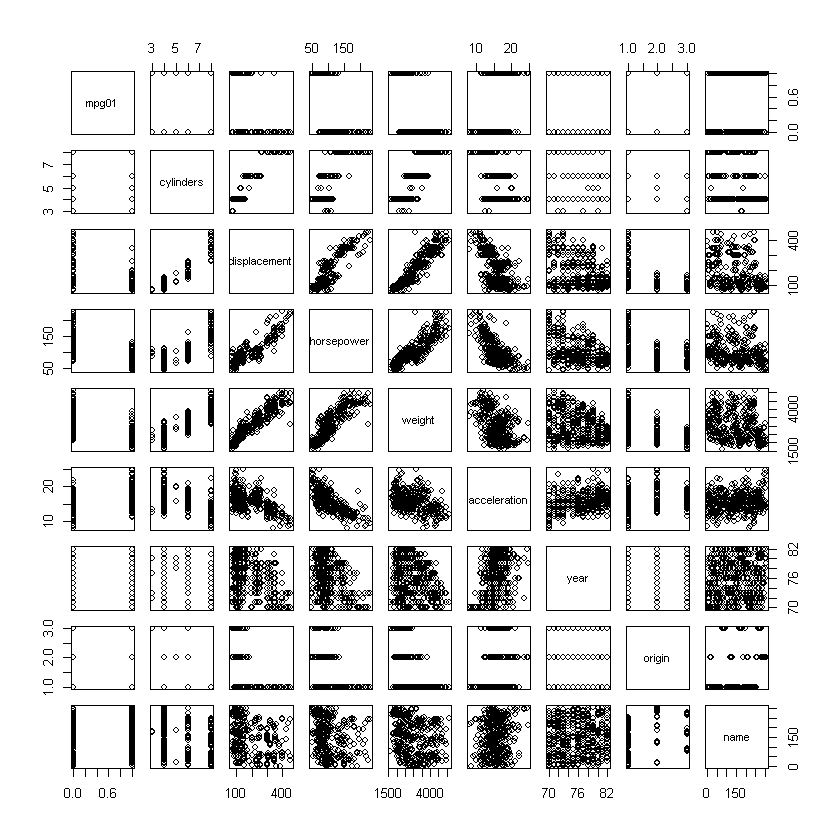

In [227]:
pairs(auto)

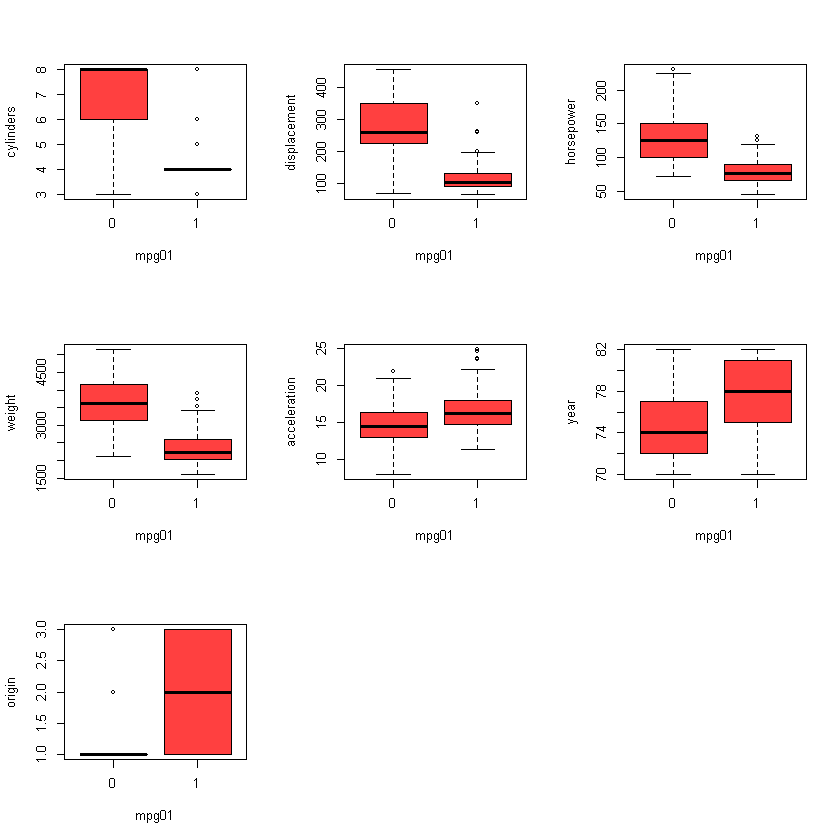

In [250]:
par(mfrow = c(3,3))
for (i in 2:8){
    plot(as.factor(mpg01),auto[,i],xlab='mpg01',ylab = names(auto)[i],col='brown1')
} 

We notice there is a relationship between mpg01 and most of the predictors, we only mention the clear ones such as cylinders, cars with mpg smaller than the median tend to have more cylinders, the opposit can be said about the Year for example. Also heavier vehicules have less mpg than the median, and cars with mpg smaller than the median tend to have more horsepower and displacement.

In [304]:
#Let's split data into train/test. let the train contain rows with even years and test for odd years.
train=subset(auto,auto$year%%2==0)
test=subset(auto,auto$year%%2==1)

In [303]:
print('****LOGISTIC REGRESSION****')
lorf=glm(mpg01~cylinders+displacement+horsepower+weight,data=train,family=binomial)
response=rep(0,nrow(test))
response[predict(lorf,test,type='response')>0.5]=1
summary(lorf)
print('****LINEAR DISCRIMINANT ANALYSIS****')
ldaf=lda(mpg01~cylinders+displacement+horsepower+weight,data=train)
ldaf
print('****QUADRATIC DISCRIMINANT ANALYSIS****')
qdaf=qda(mpg01~cylinders+displacement+horsepower+weight,data=train)
qdaf
print('****1-KNN****')
set.seed(1)
trainX=train[,2:5]
testX=test[,2:5]
labelsDir=train$mpg01
knnf=knn(trainX,testX,labelsDir,k=1)
print('****5-KNN****')
set.seed(2)
knnf5=knn(trainX,testX,labelsDir,k=5)
print('****10-KNN****')
set.seed(3)
knnf10=knn(trainX,testX,labelsDir,k=10)
results=data.frame('Model'=c('Logistic Regression','LDA','QDA','1-KNN','5-KNN','10-KNN'),'Accuracy'=c(mean(response==test$mpg01),mean(predict(ldaf,test)$class==test$mpg01),mean(predict(qdaf,test)$class==test$mpg01),mean(knnf==test$mpg01),mean(knnf5==test$mpg01),mean(knnf10==test$mpg01)))
print('****SUMMARY****')
results

[1] "****LOGISTIC REGRESSION****"



Call:
glm(formula = mpg01 ~ cylinders + displacement + horsepower + 
    weight, family = binomial, data = train)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.48027  -0.03413   0.10583   0.29634   2.57584  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  17.658730   3.409012   5.180 2.22e-07 ***
cylinders    -1.028032   0.653607  -1.573   0.1158    
displacement  0.002462   0.015030   0.164   0.8699    
horsepower   -0.050611   0.025209  -2.008   0.0447 *  
weight       -0.002922   0.001137  -2.569   0.0102 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 289.58  on 209  degrees of freedom
Residual deviance:  83.24  on 205  degrees of freedom
AIC: 93.24

Number of Fisher Scoring iterations: 7


[1] "****LINEAR DISCRIMINANT ANALYSIS****"


Call:
lda(mpg01 ~ cylinders + displacement + horsepower + weight, data = train)

Prior probabilities of groups:
        0         1 
0.4571429 0.5428571 

Group means:
  cylinders displacement horsepower   weight
0  6.812500     271.7396  133.14583 3604.823
1  4.070175     111.6623   77.92105 2314.763

Coefficients of linear discriminants:
                       LD1
cylinders    -0.6741402638
displacement  0.0004481325
horsepower    0.0059035377
weight       -0.0011465750

[1] "****QUADRATIC DISCRIMINANT ANALYSIS****"


Call:
qda(mpg01 ~ cylinders + displacement + horsepower + weight, data = train)

Prior probabilities of groups:
        0         1 
0.4571429 0.5428571 

Group means:
  cylinders displacement horsepower   weight
0  6.812500     271.7396  133.14583 3604.823
1  4.070175     111.6623   77.92105 2314.763

[1] "****1-KNN****"
[1] "****5-KNN****"
[1] "****10-KNN****"
[1] "****SUMMARY****"


Model,Accuracy
Logistic Regression,0.8791209
LDA,0.8736264
QDA,0.8681319
1-KNN,0.8461538
5-KNN,0.8516484
10-KNN,0.8461538
